In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras


2023-11-11 20:51:55.147063: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-11 20:51:55.169320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 20:51:55.169350: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 20:51:55.169365: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 20:51:55.173879: I tensorflow/core/platform/cpu_feature_g

In [6]:
image_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='input/bloodcells_dataset',
                                                 target_size=(300, 300),  
                                                 subset="training",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                 )


validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='input/bloodcells_dataset',
                                                 target_size=(300, 300), 
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                )
                                                

Found 11967 images belonging to 8 classes.
Found 5125 images belonging to 8 classes.


In [7]:
argmax_to_string = {
                     0: 'basophil',
                     1: 'eosinophil',
                     2: 'erythroblast',
                     3: 'immunoglobulin',
                     4: 'lymphocyte',
                     5: 'monocyte',
                     6: 'neutrophil',
                     7: 'platelet'
                   }

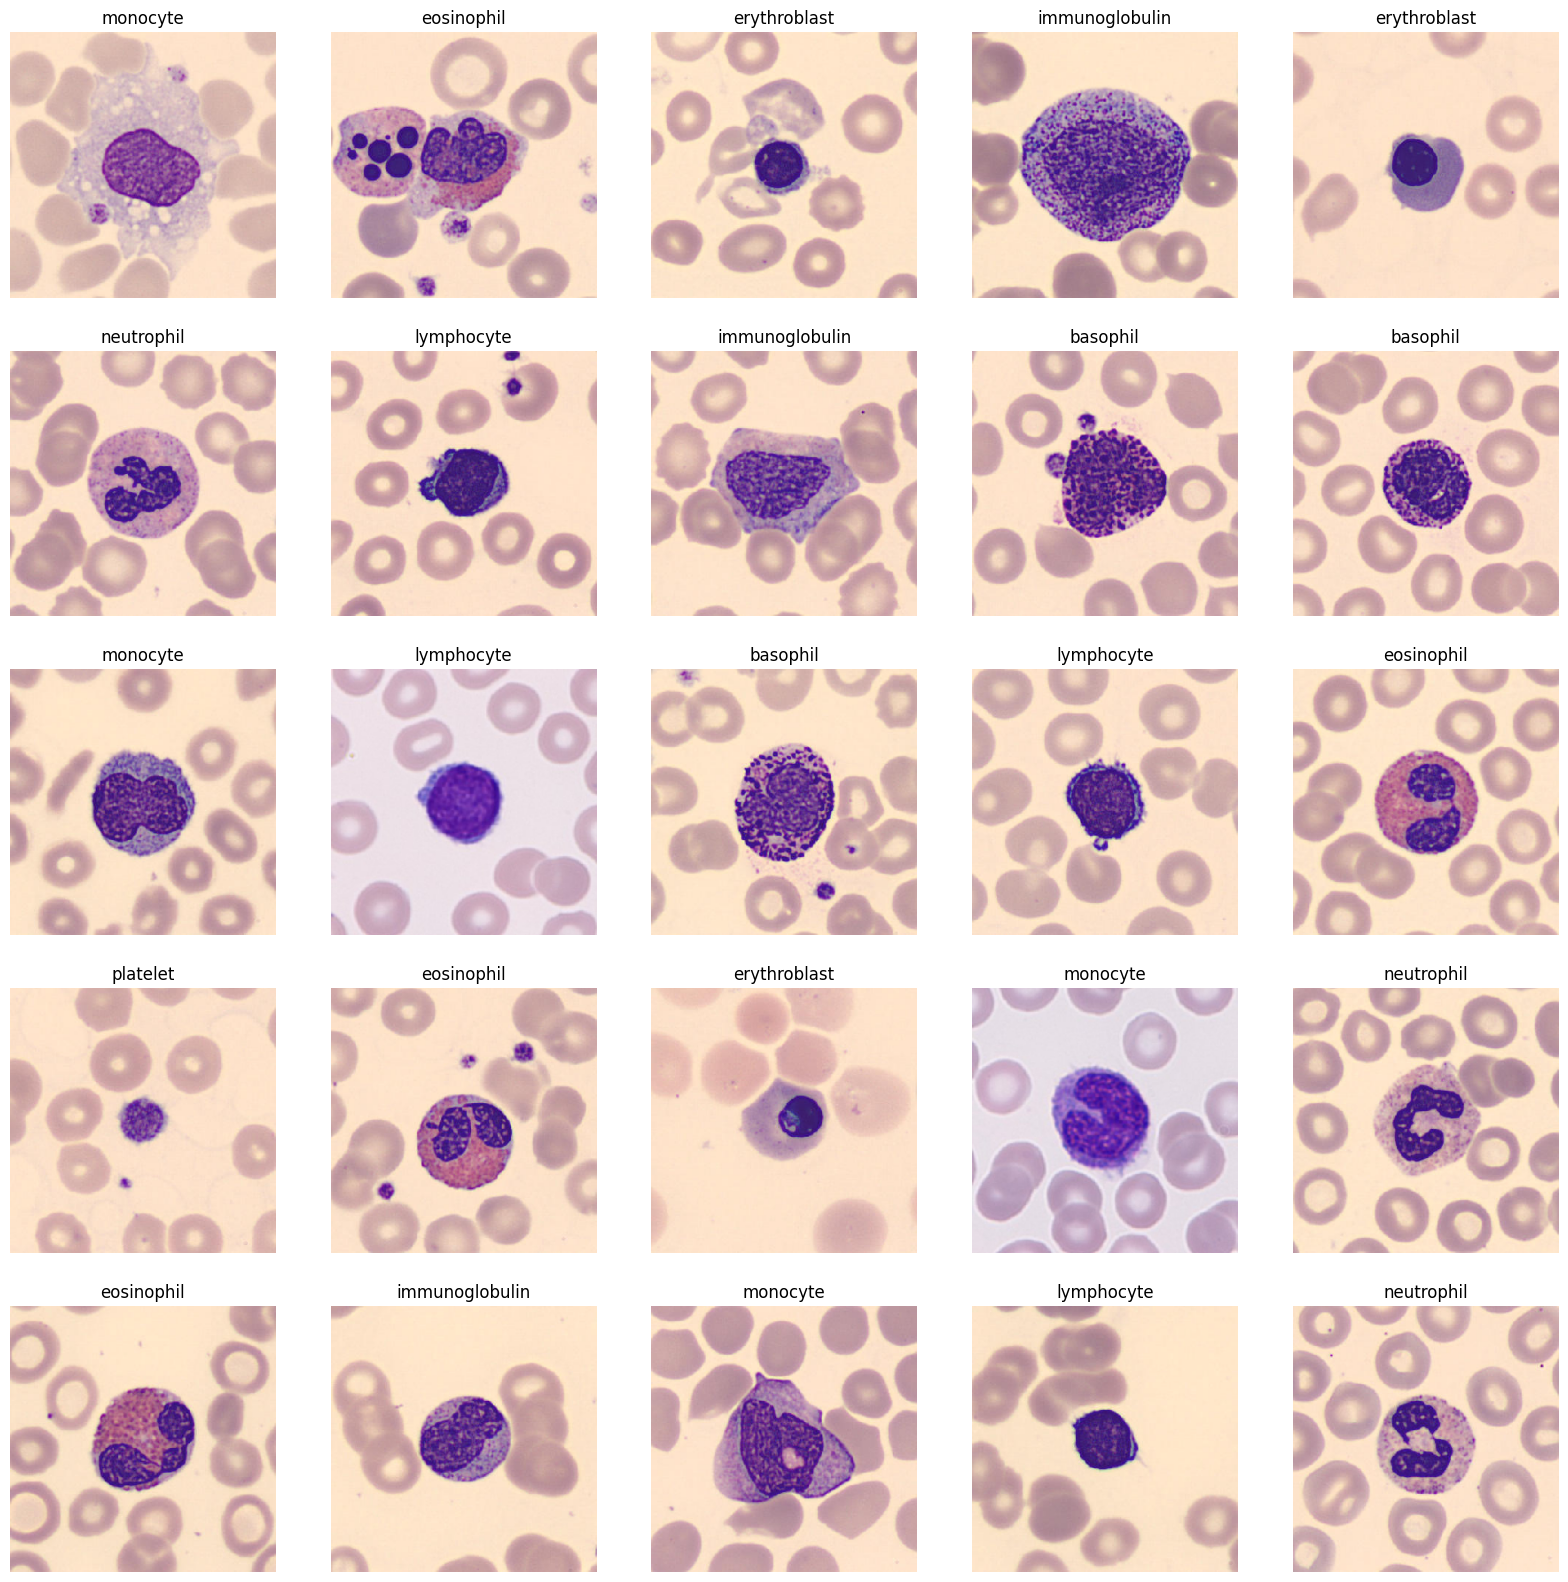

In [8]:

plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1



for img in train_dataset:
    
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) 
    plt.title(argmax_to_string[np.argmax(img[-1])])
    
    if counter >= plot_dim ** 2:
        break
    else:
        counter += 1

Распознавание и дифференциация различных типов клеток в крови может помочь медицинским работникам оптимизировать рабочий процесс, автоматизировать сложные задачи и автоматически обнаруживать возможность некоторых заболеваний.

*Базофил*: подтип лейкоцитов (защитных клеток крови), целью которого является высвобождение гистамина и гепарина при необходимости. Они составляют около 1,5% от общего числа лейкоцитов и составляют от 0 до 200 базофилов на кубический миллиметр крови у здорового человека. Эозинофилы: еще один подтип клеток защиты крови, их много при наличии какой-либо инфекции. Они составляют от 1 до 5% защитных клеток крови, а у здоровых людей их количество составляет от 40 000 до 500 000 клеток на миллилитр крови.

*Эозинофилы*: Еще один подтип клеток защиты крови, их много при наличии какой-либо инфекции. Они составляют от 1 до 5% защитных клеток крови, а у здоровых людей их количество составляет от 40 000 до 500 000 клеток на миллилитр крови.

*Эритробласт*: Среди присутствующих это единственная клетка, не являющаяся частью лейкоцитов. Таковы клетки, дающие начало эритроцитам, имеющим функцию транспорта газов в крови. Они очень многочисленны и составляют от 3,8 до 5,2 миллионов единиц на миллилитр крови.

*ИГ (иммуноглобины)*: Это гликопротеиновые молекулы, вырабатываемые плазмоцитами для ответа на определенный тип имуногена и функционирующие как антитела. Его цель — связаться с каким-то специфическим антигеном, чтобы обеспечить защиту организма.
Лимфоциты: еще один специфический тип лейкоцитов, поэтому они выполняют защитную функцию в организме. Среди типов лимфофитов встречаются клетки типа Т, В и NK. Его концентрация может указывать на инфекции (во время выделений) или указывать на такие заболевания, как анемия и лейкемия (во время низких). Обычно на кубический миллиметр крови приходится от 1500 до 3000 клеток.

*Моноцит*: Еще одна защитная клетка. Его основной характеристикой является малый жизненный цикл и большая дифференциация действия в разных частях организма (печень, нервная система, эпидермис и т. д.). Высокий уровень моноцитов может указывать на такие заболевания, как язвенный колит, лейкемия и некоторые аутоиммунные заболевания, тогда как низкий уровень моноцитов может указывать на такие заболевания, как язвенный колит, лейкемия и некоторые аутоиммунные заболевания. раз может указывать на проблемы с костным мозгом, ВПЧ или другие сопутствующие заболевания.Они составляют от 2 до 10% от общего количества лейкоцитов и варьируются от 300 до 900 единиц на кубический миллиметр.

*Нейтрофилы*: известные как полиморфно-ядерные лейкоциты, они представляют собой очень многочисленный тип клеток, присутствующих в лейкоцитах, с целью защиты человека от инфекций, вызванных различными типами вирусов и бактерий, поскольку они обладают высокой способностью осуществлять фагоцитоз. (процесс, при котором клетка охватывает твердые частицы). В целом присутствует от 2300 до 8100 кубических миллиметров.

*Тромбоциты*: небольшие фрагменты клеток типа мегакариоцитов, основная функция которых заключается в свертывании крови и предотвращении сильного кровотечения. Обычно присутствует от 150 000 до 450 000 кубических миллиметров крови. Вышеуказанные значения могут указывать на тромбоцитоз, изменения костного мозга или гемолитическую анемию. В условиях низкой эластичности они могут указывать на инфекционные заболевания, дефицит питательных веществ или проблемы с селезенкой.





In [4]:
# Создаем экземпляр нейронки

NeuralNetwork = keras.models.Sequential()
NeuralNetwork.add(keras.Input(shape=(300, 300, 3)))
NeuralNetwork.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (300, 300, 3)))
NeuralNetwork.add(keras.layers.MaxPooling2D(2, padding='same'))
NeuralNetwork.add(keras.layers.Flatten())
NeuralNetwork.add(keras.layers.Dense(64, activation='relu'))
NeuralNetwork.add(keras.layers.Dense(64, activation='relu'))
NeuralNetwork.add(keras.layers.Dense(8, activation='softmax'))

NeuralNetwork.summary()

NeuralNetwork.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'keras' is not defined

In [3]:
#Training the model with 15 iterations
NeuralNetwork.fit(train_dataset, epochs=15, validation_data=validation_dataset)

NameError: name 'NeuralNetwork' is not defined

In [8]:

min_loss_train = min(NeuralNetwork .history.history['loss'])
min_loss_val = min(NeuralNetwork .history.history['val_loss'])
                
max_accuracy_train = max(NeuralNetwork.history.history['accuracy'])
max_accuracy_val = max(NeuralNetwork .history.history['val_accuracy'])


print('Mininum of loss value from training dataset: ', round(min_loss_train, 4))
print('Mininum of loss value from validation dataset: ', round(min_loss_val, 4))
print()
print('Max accuracy from training dataset: ', round(max_accuracy_train*100, 2), '%')
print('Max accuracy from training dataset: ', round(max_accuracy_val*100, 2), '%')

KeyError: 'loss'

AttributeError: 'NoneType' object has no attribute 'history'

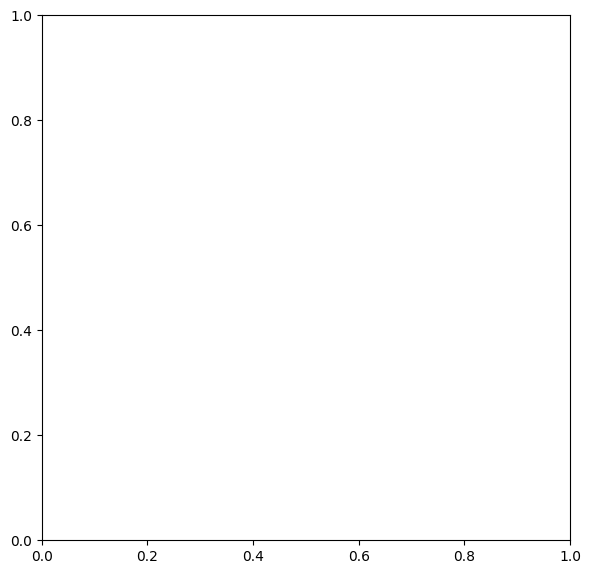

In [41]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(NeuralNetwork.history.history['accuracy'], color='tab:orange', marker='o')
plt.title('Accuracy of training dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 2)
plt.plot(NeuralNetwork.history.history['loss'], color='tab:orange', marker='o')
plt.title('Loss of training dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')

plt.subplot(2, 2, 3)
plt.plot(NeuralNetwork.history.history['val_accuracy'], color='tab:blue', marker='o')
plt.title('Accuracy of validation dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 4)
plt.plot(NeuralNetwork.history.history['val_loss'], color='tab:blue', marker='o')
plt.title('Loss of validation dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')


1/1 [==============================] - 0s 20ms/step


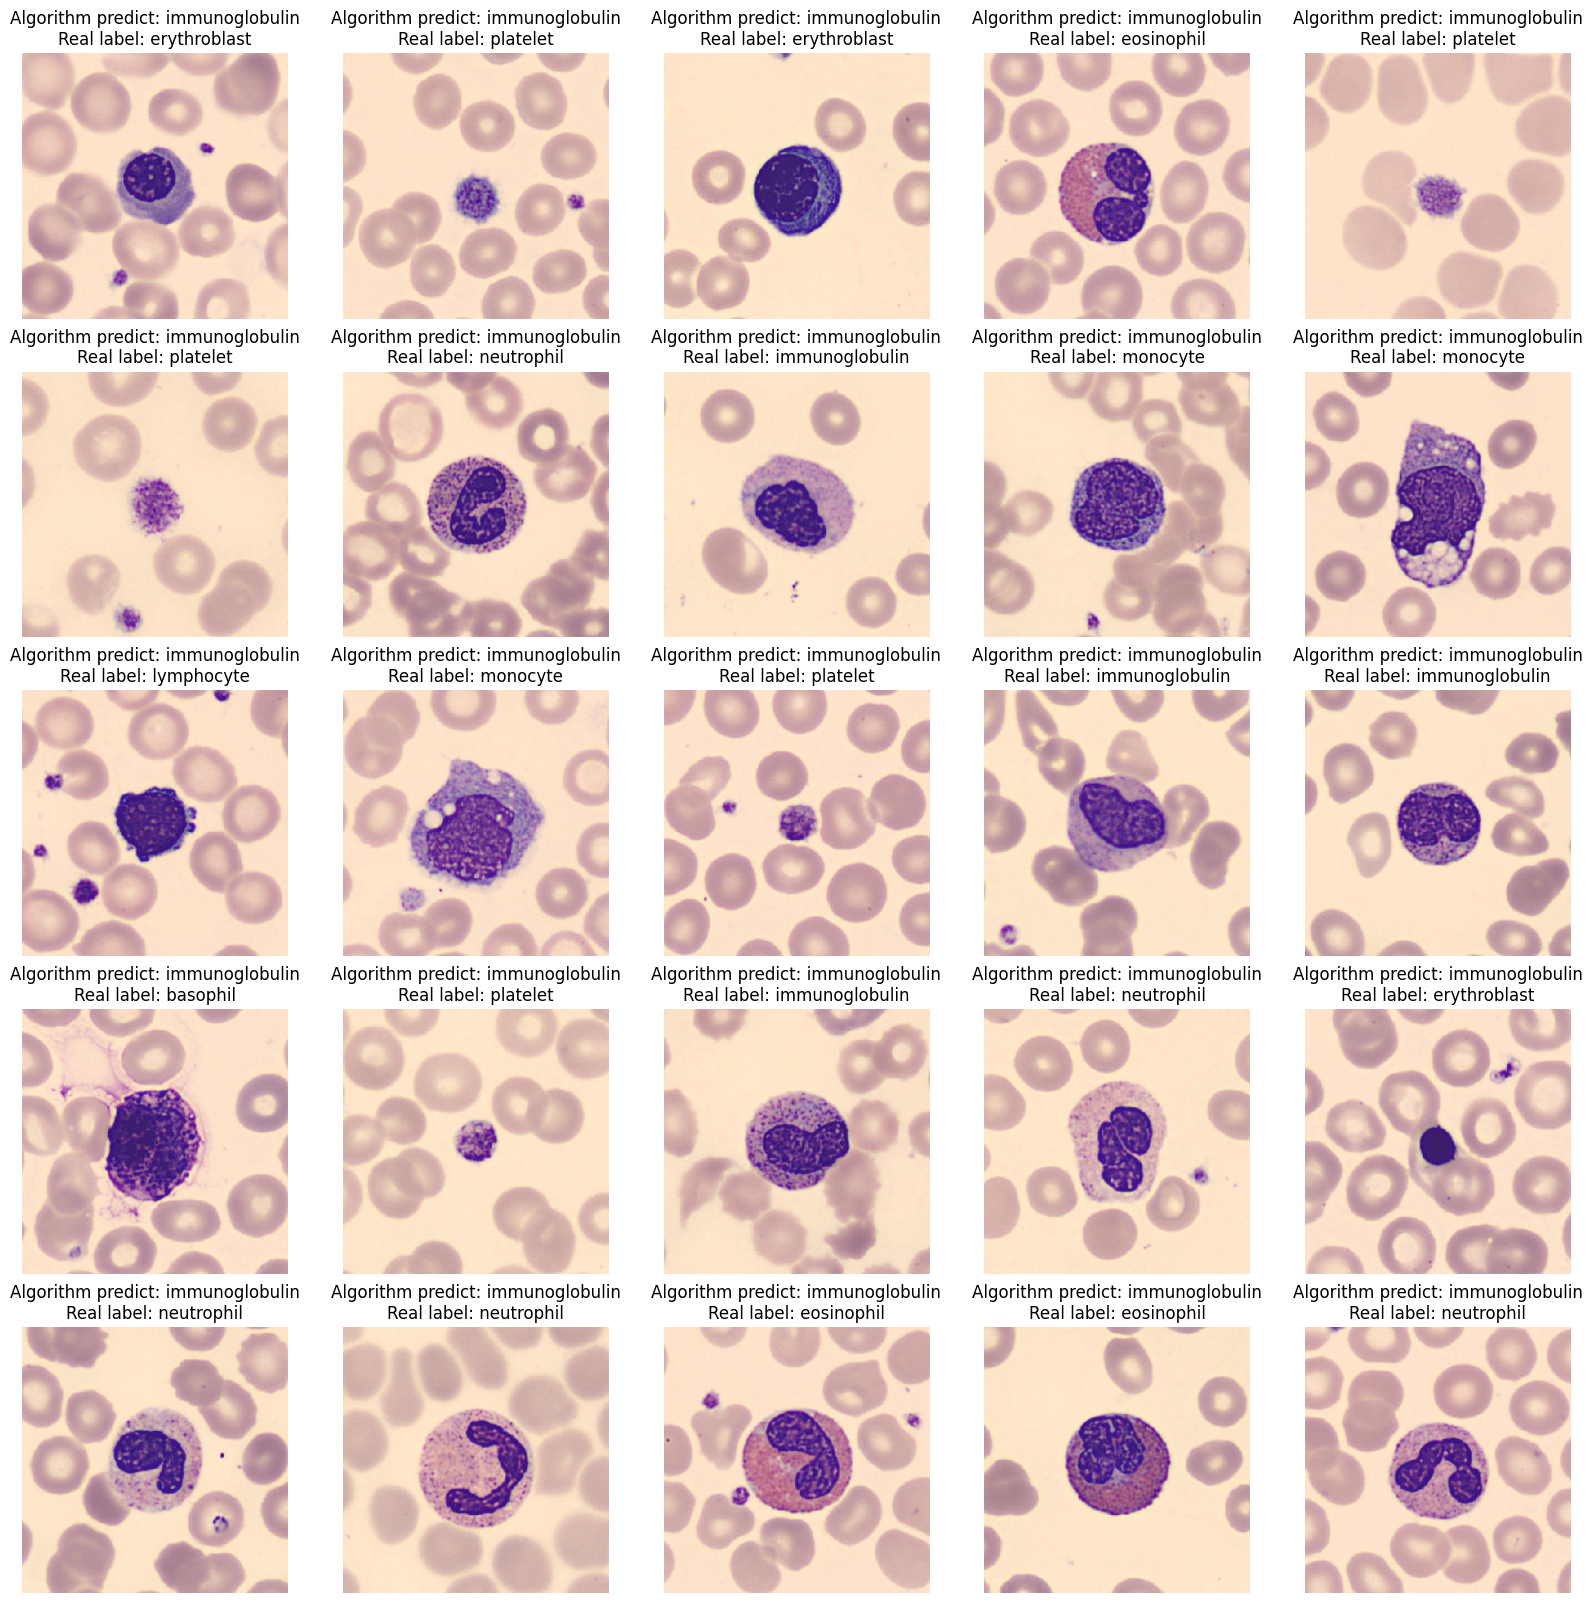

In [42]:

plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1

for img in validation_dataset:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) 
    predict = argmax_to_string[np.argmax(NeuralNetwork.predict(img[0])[0])]
    real_label = argmax_to_string[np.argmax(img[-1])]

    plt.title(f'Algorithm predict: {predict}\nReal label: {real_label}')
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1

In [21]:
NeuralNetwork.save('dos.keras')

In [28]:

model_loaded = keras.models.load_model('dos.keras')